In [1]:
!nvidia-smi

Tue May 31 11:19:11 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Install libraries

In [27]:
pip install underthesea

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 7.6 MB 6.1 MB/s 
     |████████████████████████████████| 235 kB 9.6 MB/s 
     |████████████████████████████████| 581 kB 9.9 MB/s 
     |████████████████████████████████| 965 kB 9.5 MB/s 


In [28]:
pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 346 kB 5.3 MB/s 
     |████████████████████████████████| 1.1 MB 64.0 MB/s 
     |████████████████████████████████| 212 kB 65.9 MB/s 
     |████████████████████████████████| 86 kB 6.5 MB/s 
     |████████████████████████████████| 140 kB 64.1 MB/s 
     |████████████████████████████████| 127 kB 68.4 MB/s 
     |████████████████████████████████| 94 kB 236 kB/s 
     |████████████████████████████████| 271 kB 46.9 MB/s 
     |████████████████████████████████| 144 kB 78.5 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: dill
    Found existing installation: dill 0.3.5.1
    Uninstalling dill-0.3.5.1:
      Successfully uninstalled dill-0.3.5.1
ERROR: pip's dependency resolver does not currently take into account all t

In [3]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.2 MB 5.1 MB/s 
     |████████████████████████████████| 596 kB 55.6 MB/s 
     |████████████████████████████████| 6.6 MB 50.5 MB/s 
     |████████████████████████████████| 86 kB 6.3 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


#Download vi-nli dataset and en-nli dataset from xnli

Used libraries

In [ ]:
import pandas as pd
from datasets import load_dataset
from tqdm.auto import tqdm
from os.path import join
import os

XNLI dataset includes the following columns

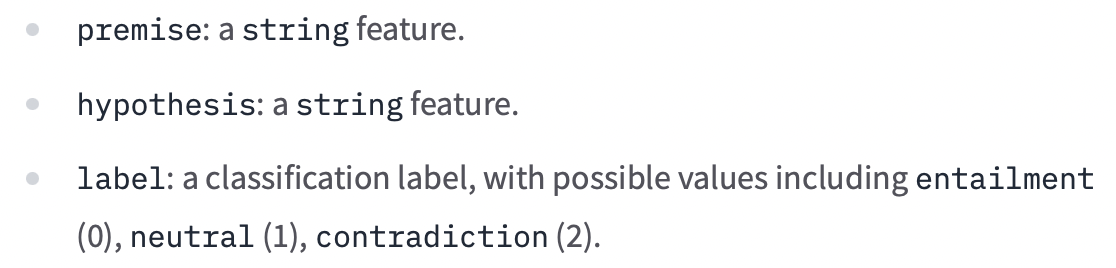

In [ ]:
vi_dataset = load_dataset("xnli",language='vi')

Using custom data configuration default-language=vi


Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Dataset xnli downloaded and prepared to /root/.cache/huggingface/datasets/xnli/default-language=vi/1.1.0/818164464f9c9fd15776ca8a00423b074344c3e929d00a2c1a84aa5a50c928bd. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
en_dataset = load_dataset("xnli",language='en')

Using custom data configuration default-language=en


Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Dataset xnli downloaded and prepared to /root/.cache/huggingface/datasets/xnli/default-language=en/1.1.0/818164464f9c9fd15776ca8a00423b074344c3e929d00a2c1a84aa5a50c928bd. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
vi_dataset

DatasetDict({
    train: Dataset({
        features: ['premise', 'hypothesis', 'label'],
        num_rows: 392702
    })
    test: Dataset({
        features: ['premise', 'hypothesis', 'label'],
        num_rows: 5010
    })
    validation: Dataset({
        features: ['premise', 'hypothesis', 'label'],
        num_rows: 2490
    })
})

In [ ]:
en_dataset

DatasetDict({
    train: Dataset({
        features: ['premise', 'hypothesis', 'label'],
        num_rows: 392702
    })
    test: Dataset({
        features: ['premise', 'hypothesis', 'label'],
        num_rows: 5010
    })
    validation: Dataset({
        features: ['premise', 'hypothesis', 'label'],
        num_rows: 2490
    })
})

In [ ]:
vi_train=pd.DataFrame(vi_dataset['train'])
vi_valid=pd.DataFrame(vi_dataset['validation'])
vi_test=pd.DataFrame(vi_dataset['test'])

In [ ]:
vi_train

,premise,hypothesis,label
0,Conceptually kem skimming có hai kích thước cơ...,Sản phẩm và địa lý là những gì làm cho kem ski...,1
1,Bạn biết trong mùa giải và tôi đoán ở mức độ c...,Anh sẽ mất mọi thứ ở mức độ sau nếu người dân ...,0
2,Một trong số chúng tôi sẽ thực hiện các hướng ...,Một thành viên trong đội của tôi sẽ thực hiện ...,0
3,Làm sao anh biết ? Tất cả đây là thông tin của...,Thông tin này thuộc về họ .,0
4,Tôi nói cho anh biết nếu anh đi giá một số đôi...,Đôi giày tennis có một tầm giá .,1
...,...,...,...
392697,"Rõ ràng , California có thể - và phải - làm tố...",California không thể làm được gì tốt hơn .,2
392698,Đó là một lần được đánh dấu là con đường đẹp n...,Rất nhiều các tòa nhà gốc đã được thay thế bởi...,1
392699,Houseboats là một truyền thống được bảo tồn tu...,Truyền thống của houseboats có nguồn gốc trong...,0
392700,Cáo phó thú vị đã ghi lại cuộc tranh luận trên...,Các cáo phó rất đẹp và được viết về những thàn...,1


In [ ]:
en_train=pd.DataFrame(en_dataset['train'])
en_valid=pd.DataFrame(en_dataset['validation'])
en_test=pd.DataFrame(en_dataset['test'])

In [ ]:
en_train

,premise,hypothesis,label
0,Conceptually cream skimming has two basic dime...,Product and geography are what make cream skim...,1
1,you know during the season and i guess at at y...,You lose the things to the following level if ...,0
2,One of our number will carry out your instruct...,A member of my team will execute your orders w...,0
3,How do you know ? All this is their informatio...,This information belongs to them .,0
4,yeah i tell you what though if you go price so...,The tennis shoes have a range of prices .,1
...,...,...,...
392697,"Clearly , California can - and must - do better .",California cannot do any better .,2
392698,It was once regarded as the most beautiful str...,So many of the original buildings had been rep...,1
392699,Houseboats are a beautifully preserved traditi...,The tradition of houseboats originated while t...,0
392700,Obituaries fondly recalled his on-air debates ...,The obituaries were beautiful and written in k...,1


Concatenate two datasets

In [ ]:
def merge_en_vi_pairs(en,vi):
  # en set, vi set set must have the same size

  en_premises=en['premise']
  en_hypothesises=en['hypothesis']
  en_labels=en['label']

  vi_premises=vi['premise']
  vi_hypothesises=vi['hypothesis']
  vi_labels=vi['label']

  pairs=[]
  num_samples=len(en)
  bar=tqdm(range(num_samples))

  for i in range(num_samples):
    if en_labels[i]==vi_labels[i]:
      pairs.append({
          'en_premise':en_premises[i],
          'vi_premise':vi_premises[i],
          'en_hypothesis':en_hypothesises[i],
          'vi_hypothesis':vi_hypothesises[i],
          'label':en_labels[i],
      })
    bar.update()
  
  return pd.DataFrame(pairs)


In [ ]:
train=merge_en_vi_pairs(en_train,vi_train)

  0%|          | 0/392702 [00:00<?, ?it/s]

In [ ]:
train

,en_premise,vi_premise,en_hypothesis,vi_hypothesis,label
0,Conceptually cream skimming has two basic dime...,Conceptually kem skimming có hai kích thước cơ...,Product and geography are what make cream skim...,Sản phẩm và địa lý là những gì làm cho kem ski...,1
1,you know during the season and i guess at at y...,Bạn biết trong mùa giải và tôi đoán ở mức độ c...,You lose the things to the following level if ...,Anh sẽ mất mọi thứ ở mức độ sau nếu người dân ...,0
2,One of our number will carry out your instruct...,Một trong số chúng tôi sẽ thực hiện các hướng ...,A member of my team will execute your orders w...,Một thành viên trong đội của tôi sẽ thực hiện ...,0
3,How do you know ? All this is their informatio...,Làm sao anh biết ? Tất cả đây là thông tin của...,This information belongs to them .,Thông tin này thuộc về họ .,0
4,yeah i tell you what though if you go price so...,Tôi nói cho anh biết nếu anh đi giá một số đôi...,The tennis shoes have a range of prices .,Đôi giày tennis có một tầm giá .,1
...,...,...,...,...,...
392697,"Clearly , California can - and must - do better .","Rõ ràng , California có thể - và phải - làm tố...",California cannot do any better .,California không thể làm được gì tốt hơn .,2
392698,It was once regarded as the most beautiful str...,Đó là một lần được đánh dấu là con đường đẹp n...,So many of the original buildings had been rep...,Rất nhiều các tòa nhà gốc đã được thay thế bởi...,1
392699,Houseboats are a beautifully preserved traditi...,Houseboats là một truyền thống được bảo tồn tu...,The tradition of houseboats originated while t...,Truyền thống của houseboats có nguồn gốc trong...,0
392700,Obituaries fondly recalled his on-air debates ...,Cáo phó thú vị đã ghi lại cuộc tranh luận trên...,The obituaries were beautiful and written in k...,Các cáo phó rất đẹp và được viết về những thàn...,1


In [ ]:
valid=merge_en_vi_pairs(en_valid,vi_valid)
test=merge_en_vi_pairs(en_test,vi_test)

  0%|          | 0/2490 [00:00<?, ?it/s]

  0%|          | 0/5010 [00:00<?, ?it/s]

In [ ]:
train.value_counts(['label'])

label
2        130903
1        130900
0        130899
dtype: int64

In [ ]:
valid.value_counts(['label'])

label
0        830
1        830
2        830
dtype: int64

In [ ]:
test.value_counts(['label'])

label
0        1670
1        1670
2        1670
dtype: int64

In [ ]:
raw_dataset_directory='/content/drive/MyDrive/en-vi-nli/raw_dataset'
os.makedirs(raw_dataset_directory,exist_ok=True)

In [ ]:
train.to_csv(f'{raw_dataset_directory}/train.csv',index=False)
valid.to_csv(f'{raw_dataset_directory}/valid.csv',index=False)
test.to_csv(f'{raw_dataset_directory}/test.csv',index=False)

#Load raw dataset

In [115]:
import pandas as pd

In [116]:
train=pd.read_csv(f'{raw_dataset_directory}/train.csv')
valid=pd.read_csv(f'{raw_dataset_directory}/valid.csv')

NameError: ignored

In [ ]:
train.value_counts(['label'])

In [117]:
valid.value_counts(['label'])

label
0        3320
1        3320
2        3320
dtype: int64

I suppose to generate dataset with the following column

- premise_language
- hypothesis_language
- premise_sentence
- hypothesis_sentence
- label

So, the final dataset will contains 
- en-vi pairs 
- vi-en pairs 
- en-en pairs 
- vi-vi pairs 

In [118]:
train=train.sample(frac=1)

In [119]:
train

,premise,hypothesis,label,premise_language,hypothesis_language,norm_premise,norm_hypothesis,norm_premise_length,norm_hypothesis_length,total_length
24248,"Lenin did not come to Russia until April , in ...",The train carried Lenin to Russia .,0,en,en,lenin did not come to russia until april in se...,train carried lenin to russia,17,7,24
136923,"In the Piazza Sant issima Annunziata , Brunell...",Kế hoạch của brunelleschi cho quảng trường đượ...,2,en,vi,in piazza sant issima annunziata brunelleschi ...,kế hoạch của brunelleschi cho quảng trường đượ...,31,27,58
182947,Knocked me out ; didn 't really touch to matte...,Drew and Anse are far from each other .,2,en,en,knocked me out did not really touch to matter ...,drew and anse are far from each other,26,9,35
104331,Anh biết là không thể đến đó hay hay vì bất cứ...,I don 't know why you wouldn 't be able to get...,1,vi,en,anh biết là không thể đến đó hay vì bất cứ lý ...,i do not know why you would not be able to get...,20,14,34
49105,Và một sự đóng băng tốt và kính chắn gió sẽ đó...,"Khi kính chắn gió đóng lại , anh lấy nước ấm r...",0,vi,vi,và một sự đóng băng tốt và kính chắn gió sẽ đó...,khi kính chắn gió đóng lại anh lấy nước ấm ra ...,33,18,51
...,...,...,...,...,...,...,...,...,...,...
315373,then we decided to have kids,Chúng tôi đã nghĩ đến việc nhận nuôi một đứa c...,1,en,vi,then we decided to have kids,chúng tôi đã nghĩ đến việc nhận nuôi một đứa c...,6,25,31
314173,Twenty minutes southwest of the city by car is...,Penicuik is a small town accessible with a 20 ...,0,en,en,twenty minutes southwest of city by car is sma...,penicuik is small town accessible with 20 minu...,15,13,28
138597,Sau một khoảng thời gian lãng mạn ?,After a romantic break ?,0,vi,en,sau một khoảng thời gian lãng mạn,after romantic break,7,3,10
291906,Hôm nay nó thường được sử dụng như bãi đậu xe ...,Princes Street is more to the north than Old T...,0,vi,en,hôm nay nó thường được sử dụng như bãi đậu xe ...,princes street is more to north than old town ...,40,14,54


In [120]:
num_train_samples_per_pair=len(train)//4
num_train_samples_per_pair

85204

In [ ]:
pairs_type=[
  ['en','vi'],['vi','en'],['en','en'],['vi','vi']
]

In [ ]:
pairs=[]
for idx,i in enumerate(pairs_type):
  
  premise_language=f'{i[0]}_premise'
  hypothesis_language=f'{i[1]}_hypothesis'
  print(premise_language,hypothesis_language)

  pair=train.iloc[idx*num_train_samples_per_pair:(idx+1)*num_train_samples_per_pair][[premise_language,hypothesis_language,'label']]
  pair['premise_language']=[i[0]]*num_train_samples_per_pair
  pair['hypothesis_language']=[i[1]]*num_train_samples_per_pair
  pair.rename(columns={premise_language:'premise',hypothesis_language:'hypothesis'},inplace=True)  
  pairs.append(pair)

en_premise vi_hypothesis
vi_premise en_hypothesis
en_premise en_hypothesis
vi_premise vi_hypothesis


In [ ]:
train=pd.concat(pairs,axis=0)

In [ ]:
train

,premise,hypothesis,label,premise_language,hypothesis_language
75902,A Newsweek story distinguishes between buzz an...,"Theo newsweek , buzz là tuyên truyền pr , tron...",2,en,vi
10206,"The inspector reported that the chair itself ,...",Cái ghế có bộ phận cũng được làm bằng nhựa và ...,1,en,vi
334670,well you know it 's it 's real funny because w...,Người phụ nữ mà tôi gặp ở bữa tiệc halloween l...,2,en,vi
252996,Even when another rift in the sky appeared wit...,Anh ta vẫn chưa bị ảnh hưởng khi có một vết nứ...,0,en,vi
84229,You can easily spend a couple of hours strolli...,Có hơn 50 khu nhà cho các bạn nhìn thấy trên đ...,0,en,vi
...,...,...,...,...,...
7678,Điệu nhảy truyền thống và nhà hát,"Khiêu vũ truyền thống , rạp hát , và âm nhạc",1,vi,vi
339414,"Trong các tế bào của thầy tu trên lầu , các bứ...",Beato angelico được nghĩ là tên của người đã t...,0,vi,vi
325800,Bây giờ không có gì giống như cảm xúc đó .,Không có cảm xúc nào so sánh được .,0,vi,vi
335703,"Vào cuối thời đại băng ( 13,000 năm trước ) , ...",Thời đại băng đã kết thúc khi trái đất trở nên...,1,vi,vi


In [ ]:
train=train.sample(frac=1)
train

,premise,hypothesis,label,premise_language,hypothesis_language
11050,He suggested that research on ways of paying f...,Scientific study of the financials surrounding...,0,en,en
351878,The Department of Defense ( DOD ) spends close...,The investment is mostly put into research .,1,en,en
114581,"A neighborhood populist , he celebrated the co...",He celebrated at a strip club and ice cream pa...,2,en,en
31676,That 'll make me an accessory to murder . ',"Do đó , tôi cũng sẽ bị trừng phạt vì tội ác là...",0,en,vi
9400,Small children are bound to enjoy the merry-go...,The pony rides are inexpensive and are a great...,1,en,en
...,...,...,...,...,...
293038,how do they react then we 're prosecuted if we...,Tôi không biết tại sao anh lại nghĩ rằng một c...,0,en,vi
347967,Nhưng tôi đã học được cách mở một con đường --...,I know how to draw from a hard path .,0,vi,en
230778,"Nếu bạn muốn biết thêm thông tin , bạn nên đến...",Đi đến trang web của họ để tìm hiểu thêm thông...,0,vi,vi
47692,same job as he was doing only he 's retired an...,Anh ta hoàn toàn nghỉ hưu và không còn làm việ...,2,en,vi


In [ ]:
pairs_dataset_directory="/content/drive/MyDrive/en-vi-nli/pairs_dataset"
os.makedirs(pairs_dataset_directory,exist_ok=True)

In [ ]:
train.to_csv(f'{pairs_dataset_directory}/train.csv',index=False)

Do the same way with valid set but 1 sample will have 4 pairs types

In [ ]:
pairs=[]
for idx,i in enumerate(pairs_type):
  
  premise_language=f'{i[0]}_premise'
  hypothesis_language=f'{i[1]}_hypothesis'
  print(premise_language,hypothesis_language)

  pair=valid[[premise_language,hypothesis_language,'label']]
  pair['premise_language']=[i[0]]*len(valid)
  pair['hypothesis_language']=[i[1]]*len(valid)
  pair.rename(columns={premise_language:'premise',hypothesis_language:'hypothesis'},inplace=True)  
  pairs.append(pair)

en_premise vi_hypothesis
vi_premise en_hypothesis
en_premise en_hypothesis
vi_premise vi_hypothesis


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [ ]:
valid=pd.concat(pairs,axis=0)

In [ ]:
valid

,premise,hypothesis,label,premise_language,hypothesis_language
0,"And he said, Mama, I'm home.","Ngay khi xuống xe buýt của trường, anh ấy gọi ...",1,en,vi
1,"And he said, Mama, I'm home.",Anh không nói một lời nào.,2,en,vi
2,"And he said, Mama, I'm home.",Anh nói với mẹ rằng anh đã về nhà.,0,en,vi
3,I didn't know what I was going for or anything...,Tôi chưa bao giờ đến Washington nên khi tôi đư...,1,en,vi
4,I didn't know what I was going for or anything...,Tôi biết chính xác những gì tôi cần làm khi tô...,2,en,vi
...,...,...,...,...,...
2485,"Từ Feisty (hăng hái), cũng giống như fizzle (c...",Fiesty đã tồn tại được 100 năm.,1,vi,vi
2486,"Từ Feisty (hăng hái), cũng giống như fizzle (c...",Sự giận dữ không liên quan đến việc fisten.,2,vi,vi
2487,"Dù lời tuyên bố sẽ tốt hơn, câu trả lời gợi lê...",Tuyên bố cung cấp thêm chi tiết.,1,vi,vi
2488,"Dù lời tuyên bố sẽ tốt hơn, câu trả lời gợi lê...",Khẳng định không tốt hơn.,2,vi,vi


In [ ]:
valid.to_csv(f'{pairs_dataset_directory}/valid.csv',index=False)

#  Preprocessing

In [29]:
import pandas as pd
import string
from transformers import AutoTokenizer
import re
import nltk
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize as nltk_word_tokenize
from nltk.tokenize import sent_tokenize as nltk_sent_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from underthesea import sent_tokenize,word_tokenize
import matplotlib.pyplot as plt
import os

In [30]:
lemmatizer = WordNetLemmatizer()

nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [31]:
pairs_dataset_directory="/content/drive/MyDrive/en-vi-nli/pairs_dataset"

In [32]:
train=pd.read_csv(f'{pairs_dataset_directory}/train.csv')
valid=pd.read_csv(f'{pairs_dataset_directory}/valid.csv')

In [33]:
train.value_counts(['label'])

label
2        130902
1        130900
0        130898
dtype: int64

In [34]:
train.value_counts(['premise_language','hypothesis_language'])

premise_language  hypothesis_language
en                en                     98175
                  vi                     98175
vi                en                     98175
                  vi                     98175
dtype: int64

In [35]:
valid.value_counts(['label'])

label
0        3320
1        3320
2        3320
dtype: int64

In [36]:
valid.value_counts(['premise_language','hypothesis_language'])

premise_language  hypothesis_language
en                en                     2490
                  vi                     2490
vi                en                     2490
                  vi                     2490
dtype: int64

In [37]:
tokenizer=AutoTokenizer.from_pretrained('xlm-roberta-base')

In [38]:
train

,premise,hypothesis,label,premise_language,hypothesis_language
0,maybe not a case of everybody being selfish ev...,I think it is selfish to expect everyone to ca...,2,en,en
1,Trong một phút hai xu nghĩ rằng cô ấy sẽ đến m...,Tuppence was thinking of actually pulling the ...,0,vi,en
2,"Hai người chúng tôi bước ra khỏi trực thăng , ...",The pilot came with us when we left the helico...,2,vi,en
3,We are face to face with an entirely new probl...,Bây giờ chúng ta phải đối mặt với một vấn đề k...,0,en,vi
4,"Đại sảnh chính , được gọi là sanbutsudo , với ...",The Sanbutsudo building was commissioned by th...,1,vi,en
...,...,...,...,...,...
392695,Both the politically left and the right wanted...,Các Đảng chính trị ý đã tìm kiếm để tạo ra các...,0,en,vi
392696,Nó cũng có một viện bảo tàng và nhà hát .,The theater is smaller than the museum .,1,vi,en
392697,"Kết hợp với thiết lập địa chất của thành phố ,...",Họ không thể phát triển thành phố bởi vì có nh...,1,vi,vi
392698,"À , tôi không bao giờ có một thời gian khó khă...",When I got home I was married and I got out of...,0,vi,en


In [39]:
punctuations=list(string.punctuation)

In [45]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",

                           "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",

                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",

                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",

                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",

                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",

                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",

                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",

                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",

                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",

                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",

                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",

                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",

                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",

                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",

                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",

                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",

                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",

                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",

                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",

                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",

                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",

                           "you're": "you are", "you've": "you have"}

In [46]:
def normalizer(s,lang='en'):
  def remove_articles(text):
    regex = re.compile(r'\b(a|an|the)\b', re.UNICODE)
    return re.sub(regex, ' ', text)

  def white_space_fix(text):
    return ' '.join(text.split())

  def remove_punc(text):
    exclude = set(string.punctuation)
    return ''.join(ch for ch in text if ch not in exclude)

  def lower(text):
    return text.lower()

  def replace_contractions(text):
    for k,v in contraction_mapping.items():
      k=re.sub(r'\''," '",k)
      text=text.replace(k,v)
    return text

  def remove_continuous_duplications(text):
    if text.strip()=="":
      return text
    
    tokens=text.split()
    
    num_tokens=len(tokens)
    if text.strip()=="":
      return text
    _tokens=[tokens[0]]
    for i in range(1,num_tokens):

      if i==num_tokens-1:
        if tokens[i]!=tokens[i-1]:
          _tokens.append(tokens[i])  
        break
      
      if tokens[i]!=tokens[i-1]:
        _tokens.append(tokens[i])
    return " ".join(_tokens)

  def lemmatization(text,language='en'):
    return text
    # def get_wordnet_pos(treebank_tag):

    #   if treebank_tag.startswith('J'):
    #       return wordnet.ADJ
    #   elif treebank_tag.startswith('V'):
    #       return wordnet.VERB
    #   elif treebank_tag.startswith('N'):
    #       return wordnet.NOUN
    #   elif treebank_tag.startswith('R'):
    #       return wordnet.ADV
    #   else:
    #       return None

    # if language=='en':
    #   sents=nltk_sent_tokenize(text)
    #   new_tokens=[]
    #   for sent in sents:

    #     tokens=nltk_word_tokenize(sent)
    #     _tokens=[]
    #     tagged = nltk.pos_tag(tokens)
    #     for word, tag in tagged:
    #       wntag = get_wordnet_pos(tag)
    #       lemma=word
    #       if wntag is not None:
    #           lemma = lemmatizer.lemmatize(lemma, pos=wntag) 
    #       _tokens.append(lemma)
    #     new_tokens+=_tokens
    #   return " ".join(new_tokens)

    # if language=='vi':
    #   tokens=[]
      
    #   for sent in sent_tokenize(text):
    #     tokens+=word_tokenize(sent)
    #   return " ".join(tokens)

  return white_space_fix(remove_continuous_duplications(remove_articles(remove_punc(lemmatization(replace_contractions(lower(s)),language=lang))))).strip()

In [47]:
def multiple_normalizer(df):
  num_samples=len(df)
  premises=[]
  hypothesises=[]
  bar=tqdm(range(num_samples))
  for i in range(num_samples):
    row=df.iloc[i]
    norm_premise=normalizer(row['premise'],row['premise_language'])
    norm_hypothesis=normalizer(row['hypothesis'],row['hypothesis_language'])
    premises.append(norm_premise)
    hypothesises.append(norm_hypothesis)
    bar.update()
  return premises,hypothesises

In [48]:
premsises,hypothesises=multiple_normalizer(train)
train['norm_premise']=premsises
train['norm_hypothesis']=hypothesises

  0%|          | 0/392700 [00:00<?, ?it/s]

In [49]:
premsises,hypothesises=multiple_normalizer(valid)
valid['norm_premise']=premsises
valid['norm_hypothesis']=hypothesises

  0%|          | 0/9960 [00:00<?, ?it/s]

In [50]:
def get_seq_length(s):
  toks=tokenizer.tokenize(s)
  return len(toks)

In [51]:
train['norm_premise_length']=train['norm_premise'].map(get_seq_length)
train['norm_hypothesis_length']=train['norm_hypothesis'].map(get_seq_length)
train['total_length']=train['norm_premise_length']+train['norm_hypothesis_length']

In [52]:
valid['norm_premise_length']=valid['norm_premise'].map(get_seq_length)
valid['norm_hypothesis_length']=valid['norm_hypothesis'].map(get_seq_length)
valid['total_length']=valid['norm_premise_length']+valid['norm_hypothesis_length']

In [53]:
def seq_len_visualizer(x,y):
  fig, ax = plt.subplots(1, 1, sharex=True, sharey=True,figsize=(20,20))
  ax.bar(x,y)
  fig.show()

Visualize premise length distribution

(None, 447)

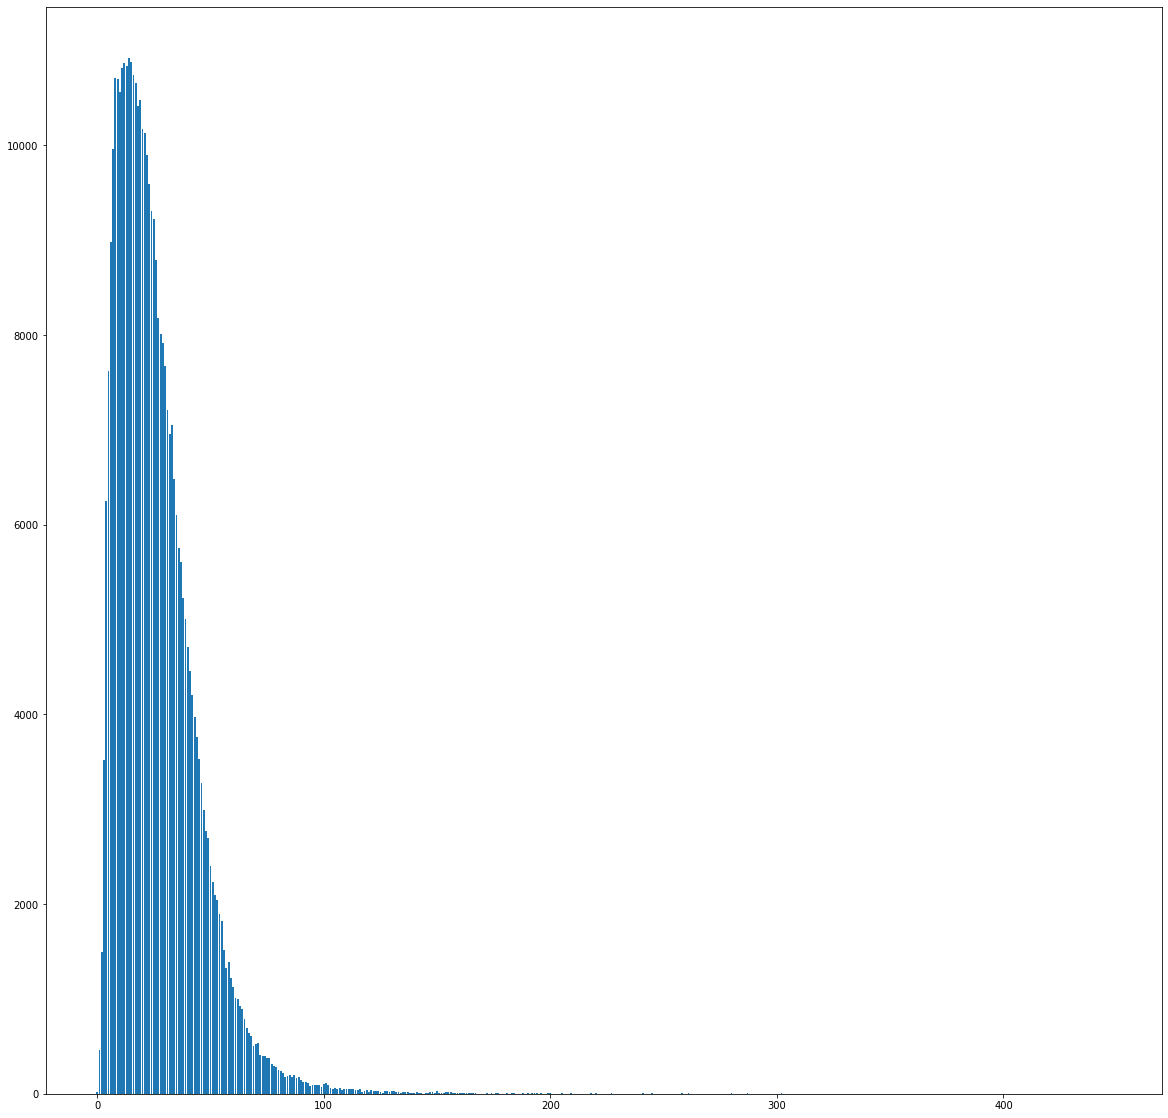

In [54]:
value_counts=train['norm_premise_length'].value_counts()
dict_occurs=value_counts.to_dict()
x,y=list(dict_occurs.keys()),list(dict_occurs.values())
seq_len_visualizer(x,y),max(x)

max length of train premise is 447

(None, 100)

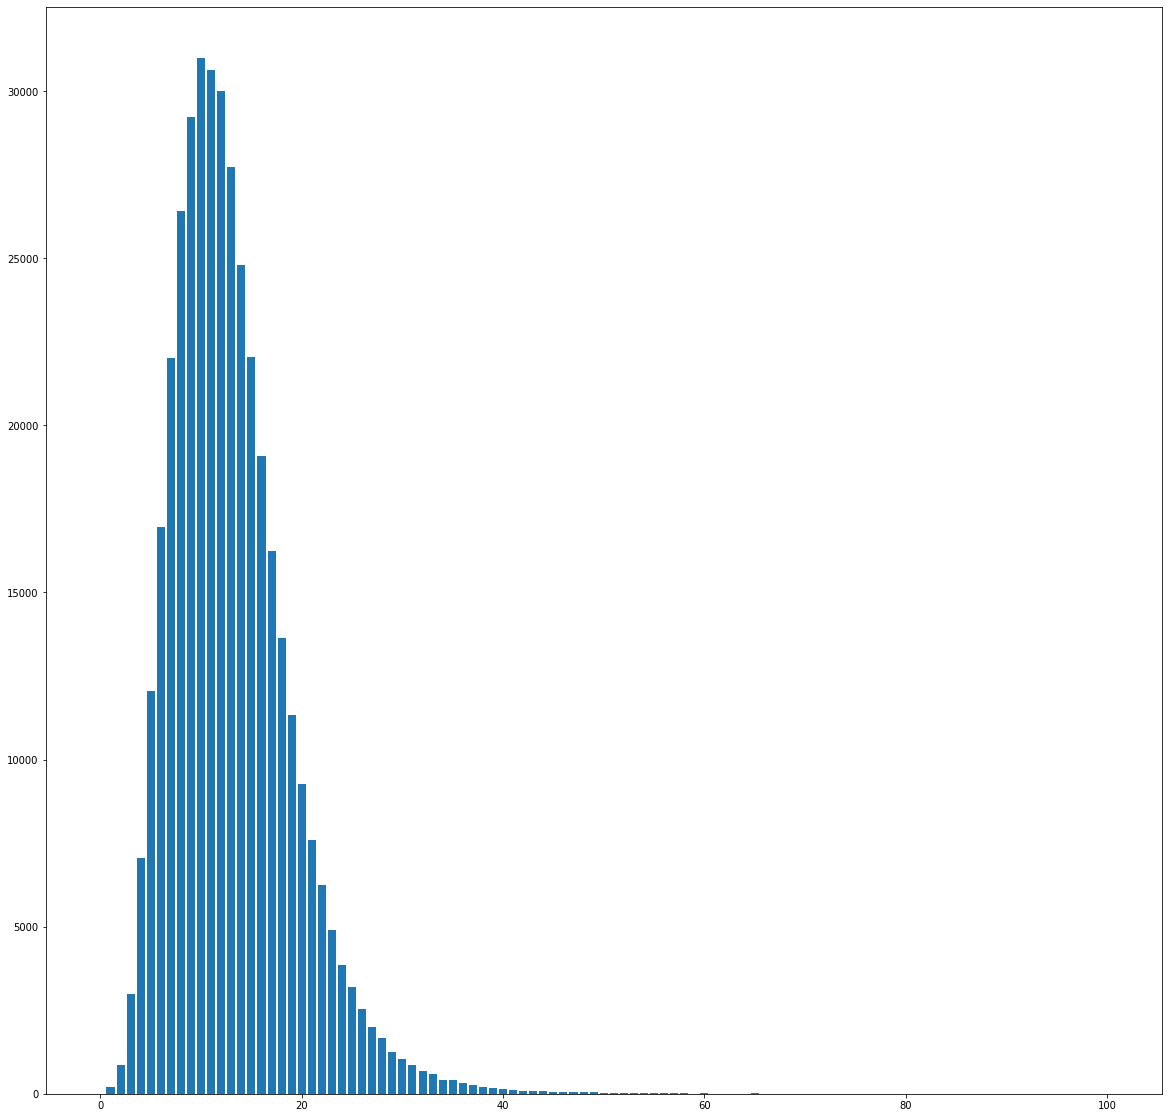

In [55]:
value_counts=train['norm_hypothesis_length'].value_counts()
dict_occurs=value_counts.to_dict()
x,y=list(dict_occurs.keys()),list(dict_occurs.values())
seq_len_visualizer(x,y),max(x)

max length of train hypothesis is 100

(None, 460)

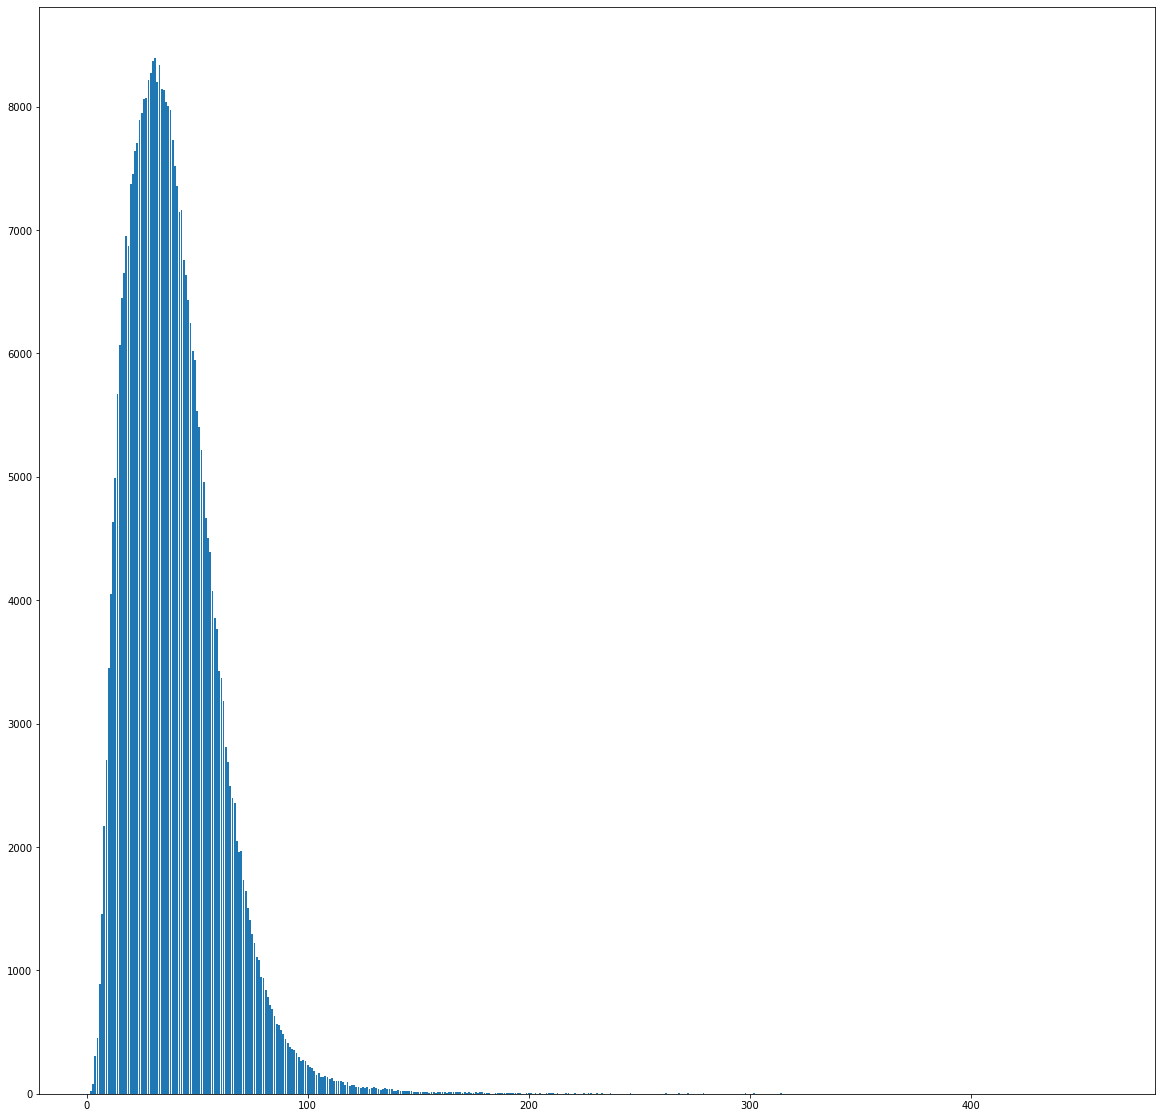

In [56]:
value_counts=train['total_length'].value_counts()
dict_occurs=value_counts.to_dict()
x,y=list(dict_occurs.keys()),list(dict_occurs.values())
seq_len_visualizer(x,y),max(x)

max length of train premise and hypothesis is 460

There are some empty premise and hypothesis -> remove them

In [57]:
train=train[train['norm_hypothesis_length']!=0]

In [58]:
train=train[train['norm_premise_length']!=0]

In [59]:
pre_dataset_directory="/content/drive/MyDrive/en-vi-nli/pre_dataset"
os.makedirs(pre_dataset_directory,exist_ok=True)

In [60]:
train.to_csv(f'{pre_dataset_directory}/train.csv',index=False)

Because of the limitation GPU T4 Tesla, I will take the small dataset from the total by choosing the total length is under 100 because of those above images

In [61]:
import pandas as pd
train=pd.read_csv(f'{pre_dataset_directory}/train.csv')
train

,premise,hypothesis,label,premise_language,hypothesis_language,norm_premise,norm_hypothesis,norm_premise_length,norm_hypothesis_length,total_length
0,maybe not a case of everybody being selfish ev...,I think it is selfish to expect everyone to ca...,2,en,en,maybe not case of everybody being selfish ever...,i think it is selfish to expect everyone to ca...,21,15,36
1,Trong một phút hai xu nghĩ rằng cô ấy sẽ đến m...,Tuppence was thinking of actually pulling the ...,0,vi,en,trong một phút hai xu nghĩ rằng cô ấy sẽ đến m...,tuppence was thinking of actually pulling trigger,47,10,57
2,"Hai người chúng tôi bước ra khỏi trực thăng , ...",The pilot came with us when we left the helico...,2,vi,en,hai người chúng tôi bước ra khỏi trực thăng ph...,pilot came with us when we left helicopter,30,10,40
3,We are face to face with an entirely new probl...,Bây giờ chúng ta phải đối mặt với một vấn đề k...,0,en,vi,we are face to face with entirely new problem,bây giờ chúng ta phải đối mặt với một vấn đề khác,9,12,21
4,"Đại sảnh chính , được gọi là sanbutsudo , với ...",The Sanbutsudo building was commissioned by th...,1,vi,en,đại sảnh chính được gọi là sanbutsudo với một ...,sanbutsudo building was commissioned by empero...,39,13,52
...,...,...,...,...,...,...,...,...,...,...
392679,Both the politically left and the right wanted...,Các Đảng chính trị ý đã tìm kiếm để tạo ra các...,0,en,vi,both politically left and right wanted italy t...,các đảng chính trị ý đã tìm kiếm để tạo ra các...,26,21,47
392680,Nó cũng có một viện bảo tàng và nhà hát .,The theater is smaller than the museum .,1,vi,en,nó cũng có một viện bảo tàng và nhà hát,theater is smaller than museum,10,6,16
392681,"Kết hợp với thiết lập địa chất của thành phố ,...",Họ không thể phát triển thành phố bởi vì có nh...,1,vi,vi,kết hợp với thiết lập địa chất của thành phố s...,họ không thể phát triển thành phố bởi vì có nh...,16,19,35
392682,"À , tôi không bao giờ có một thời gian khó khă...",When I got home I was married and I got out of...,0,vi,en,à tôi không bao giờ có một thời gian khó khăn ...,when i got home i was married and i got out of...,196,22,218


In [63]:
train_60=train[train['total_length']<=60]
train_60

,premise,hypothesis,label,premise_language,hypothesis_language,norm_premise,norm_hypothesis,norm_premise_length,norm_hypothesis_length,total_length
0,maybe not a case of everybody being selfish ev...,I think it is selfish to expect everyone to ca...,2,en,en,maybe not case of everybody being selfish ever...,i think it is selfish to expect everyone to ca...,21,15,36
1,Trong một phút hai xu nghĩ rằng cô ấy sẽ đến m...,Tuppence was thinking of actually pulling the ...,0,vi,en,trong một phút hai xu nghĩ rằng cô ấy sẽ đến m...,tuppence was thinking of actually pulling trigger,47,10,57
2,"Hai người chúng tôi bước ra khỏi trực thăng , ...",The pilot came with us when we left the helico...,2,vi,en,hai người chúng tôi bước ra khỏi trực thăng ph...,pilot came with us when we left helicopter,30,10,40
3,We are face to face with an entirely new probl...,Bây giờ chúng ta phải đối mặt với một vấn đề k...,0,en,vi,we are face to face with entirely new problem,bây giờ chúng ta phải đối mặt với một vấn đề khác,9,12,21
4,"Đại sảnh chính , được gọi là sanbutsudo , với ...",The Sanbutsudo building was commissioned by th...,1,vi,en,đại sảnh chính được gọi là sanbutsudo với một ...,sanbutsudo building was commissioned by empero...,39,13,52
...,...,...,...,...,...,...,...,...,...,...
392678,"All right , then , if you thought I was dead ,...","If you knew I was alive , why did you not come...",2,en,en,all right then if you thought i was dead what ...,if you knew i was alive why did you not come back,27,13,40
392679,Both the politically left and the right wanted...,Các Đảng chính trị ý đã tìm kiếm để tạo ra các...,0,en,vi,both politically left and right wanted italy t...,các đảng chính trị ý đã tìm kiếm để tạo ra các...,26,21,47
392680,Nó cũng có một viện bảo tàng và nhà hát .,The theater is smaller than the museum .,1,vi,en,nó cũng có một viện bảo tàng và nhà hát,theater is smaller than museum,10,6,16
392681,"Kết hợp với thiết lập địa chất của thành phố ,...",Họ không thể phát triển thành phố bởi vì có nh...,1,vi,vi,kết hợp với thiết lập địa chất của thành phố s...,họ không thể phát triển thành phố bởi vì có nh...,16,19,35


In [64]:
train_60.to_csv(f'{pre_dataset_directory}/train_60.csv',index=False)

In [65]:
valid.to_csv(f'{pre_dataset_directory}/valid.csv',index=False)

#Create inputs for BERT

In [1]:
import pandas as pd
from transformers import AutoTokenizer, AutoConfig,AutoModel,AutoModelForSequenceClassification,get_linear_schedule_with_warmup,BertPreTrainedModel
from torch.utils.data import DataLoader, Dataset
import torch
import numpy as np
from os.path import join
from tqdm.auto import tqdm
import os
from os.path import join
from torch import nn
from torch.nn import CrossEntropyLoss
from transformers.modeling_outputs import SequenceClassifierOutput

In [5]:
name='xlm-roberta-base'

In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [7]:
pre_dataset_directory="/content/drive/MyDrive/en-vi-nli/pre_dataset"

In [8]:
train=pd.read_csv(f'{pre_dataset_directory}/train_60.csv')
valid=pd.read_csv(f'{pre_dataset_directory}/valid.csv')

In [9]:
len(train),len(valid)

(340816, 9960)

In [10]:
class ClassificationDataset(Dataset):
    def __init__(self, input_ids, attention_mask,labels,device,token_type_ids=None):
        self.labels = labels
        self.input_ids=input_ids
        self.attention_mask=attention_mask
        self.token_type_ids=token_type_ids
        self.device=device
        
    def __len__(self):
            return len(self.labels)

    def __getitem__(self, idx):
        label = self.labels[idx]
        input_ids = self.input_ids[idx]
        attention_mask = self.attention_mask[idx]
        sample = {"inputs":{"input_ids": input_ids.to(self.device),'attention_mask':attention_mask.to(self.device)}, "labels": label.to(self.device)}
        if self.token_type_ids!=None:
          sample['inputs'].update({'token_type_ids':self.token_type_ids[idx].to(self.device)})
        return sample

In [11]:
def create_input(tokenizer,token_ids_0,token_ids_1=None,max_length=512,padding=True):
  num_tokens_0=len(token_ids_0)
  num_tokens_1=len(token_ids_1)
  
  threshold_num_tokens_0=max_length-4-num_tokens_1
  if threshold_num_tokens_0<0:
    return None
  trade_off=abs(threshold_num_tokens_0-num_tokens_0)
  if num_tokens_0>threshold_num_tokens_0:
    
    head_token_ids_0=token_ids_0[:threshold_num_tokens_0]
    tail_token_ids_0=token_ids_0[-threshold_num_tokens_0:]

    head_input_ids=tokenizer.build_inputs_with_special_tokens(head_token_ids_0,token_ids_1)
    head_attention_mask=[1]*len(head_input_ids)

    tail_input_ids=tokenizer.build_inputs_with_special_tokens(tail_token_ids_0,token_ids_1)
    tail_attention_mask=[1]*len(tail_input_ids)
    
    input_ids=[head_input_ids,tail_input_ids]

    attention_mask=[head_attention_mask,tail_attention_mask]
  else:
    input_ids=tokenizer.build_inputs_with_special_tokens(token_ids_0,token_ids_1)
    attention_mask=[1]*len(input_ids)
    if padding==True:
      input_ids=input_ids+[1]*trade_off
      attention_mask=attention_mask+[0]*trade_off
    input_ids=[input_ids]
    attention_mask=[attention_mask]
  return input_ids,attention_mask

In [12]:
def create_inputs(tokenizer,list_sentences_0,list_sentences_1,list_labels,max_length=512):
  
  input_ids=[]
  labels=[]
  bar=tqdm(list_sentences_0)
  attention_mask=[]
  num_training_samples=len(list_sentences_0)
  for i in range(num_training_samples):
    token_ids_0=tokenizer.encode(list_sentences_0[i],add_special_tokens=False)
    token_ids_1=tokenizer.encode(list_sentences_1[i],add_special_tokens=False)
    _input_ids,_attention_mask=create_input(tokenizer,token_ids_0,token_ids_1,max_length)
    
    _labels=[list_labels[i]]*len(_input_ids)
    labels+=_labels
    input_ids+=_input_ids
    attention_mask+=_attention_mask
    bar.update()  
  return {
    'input_ids':torch.Tensor(input_ids).to(torch.long),
    'attention_mask':torch.Tensor(attention_mask).to(torch.int),
    'labels':torch.Tensor(labels).to(torch.long)
}

In [13]:
max_length=60

In [14]:
tokenizer = AutoTokenizer.from_pretrained(name)

In [15]:
def create_dataloader(tokenizer,list_sentences_0,list_sentences_1,list_labels,max_length=512,batch_size=32,drop_last=False,shuffle=True,device='cpu'):
  dataloader=create_inputs(tokenizer,list_sentences_0,list_sentences_1,list_labels,max_length)

  dataloader=ClassificationDataset(**dataloader,device=device)
  dataloader=DataLoader(dataloader,batch_size=batch_size,drop_last=drop_last,shuffle=shuffle)
  return dataloader

In [16]:
train_batch_size=32
train_premises=train['norm_premise'].tolist()
train_hypothesises=train['norm_hypothesis'].tolist()
train_labels=train['label'].tolist()

In [17]:
train_dataloader=create_dataloader(tokenizer,train_premises,train_hypothesises,train_labels,max_length,train_batch_size,device=device,shuffle=False)

  0%|          | 0/340816 [00:00<?, ?it/s]

In [18]:
valid_batch_size=32
valid_premises=valid['norm_premise'].tolist()
valid_hypothesises=valid['norm_hypothesis'].tolist()
valid_labels=valid['label'].tolist()

In [19]:
valid_dataloader=create_dataloader(tokenizer,valid_premises,valid_hypothesises,valid_labels,max_length,valid_batch_size,device=device,shuffle=False)

  0%|          | 0/9960 [00:00<?, ?it/s]

In [20]:
labels=[0,1,2]
labels

[0, 1, 2]

#Trainer

In [21]:
epochs=4
num_training_steps=epochs *len(train_dataloader)
num_warmup_steps=500
init_lr=1e-5
eps =1e-8

In [22]:
len(train_dataloader),num_training_steps,num_warmup_steps

(11124, 44496, 500)

In [23]:
num_labels=len(labels)
num_labels

3

In [24]:
classifier_dropout=0.1

In [25]:
config=AutoConfig.from_pretrained(name)
config.classifier_dropout=classifier_dropout
config.num_labels=num_labels
config

XLMRobertaConfig {
  "_name_or_path": "xlm-roberta-base",
  "architectures": [
    "XLMRobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": 0.1,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2
  },
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "xlm-roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "output_past": true,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "transformers_version": "4.19.2",
  "type_vocab_size": 1,
  "use_cache": true,
  "vocab_size": 250002
}

In [26]:
model_directory='/content/drive/MyDrive/en-vi-nli/models'
os.makedirs(model_directory,exist_ok=True)

In [27]:
config.save_pretrained(model_directory)

In [28]:
config.num_labels

3

##fine-tuning last layer of BERT

In [29]:
model=AutoModelForSequenceClassification.from_pretrained(name,config=config).to(device)

Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForSequenceClassification: ['lm_head.dense.bias', 'lm_head.bias', 'lm_head.dense.weight', 'roberta.pooler.dense.bias', 'lm_head.layer_norm.weight', 'roberta.pooler.dense.weight', 'lm_head.decoder.weight', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.out_p

##fine-tuning 4 last concatenating layers of BERT

In [45]:
class XLMRoBERTa4LastLayersForClassification(BertPreTrainedModel):
  def __init__(self, config,from_pretrained=False,add_pooling_layer=False):
    super(XLMRoBERTa4LastLayersForClassification,self).__init__(config)
    self.config = config
    self.bert_name=self.config._name_or_path
    self.from_pretrained=from_pretrained
    self.add_pooling_layer=add_pooling_layer

    if self.from_pretrained:
      self.bert= AutoModel.from_pretrained(self.bert_name,self.add_pooling_layer,config=self.config)
    else:
      self.bert= AutoModel.from_config(self.add_pooling_layer,config=self.config)

    self.dense = nn.Linear(config.hidden_size*4, config.hidden_size)

    self.dropout = nn.Dropout(classifier_dropout)    

    self.classifier = nn.Linear(self.config.hidden_size, self.config.num_labels)

    self.post_init()



  def forward(self,input_ids,attention_mask,labels=None):

    outputs = self.bert(input_ids=input_ids,attention_mask=attention_mask,output_hidden_states=True)
    last_layers=torch.stack(outputs.hidden_states[-4:])
    last_layers=last_layers.permute(1,2,0,3)
    features=torch.flatten(last_layers,start_dim=2)


    pooled_output = features[:,0]
    pooled_output = self.dropout(pooled_output)
    pooled_output = self.dense(pooled_output)
    pooled_output = torch.tanh(pooled_output)
    pooled_output = self.dropout(pooled_output)

    logits = self.classifier(pooled_output)
    
    loss_fct = CrossEntropyLoss()
    loss = loss_fct(logits.view(-1, self.config.num_labels), labels.view(-1))
    return SequenceClassifierOutput(
            loss=loss,
            logits=logits)

##fine-tuning 4 last concatenating layers of BERT + mean-max pooling

In [ ]:
class XLMRoBERTa4LastLayersForClassification(BertPreTrainedModel):
  def __init__(self, config,from_pretrained=False,add_pooling_layer=False):
    super(XLMRoBERTa4LastLayersForClassification,self).__init__(config)
    self.config = config
    self.bert_name=self.config._name_or_path
    self.from_pretrained=from_pretrained
    self.add_pooling_layer=add_pooling_layer

    if self.from_pretrained:
      self.bert= AutoModel.from_pretrained(self.bert_name,self.add_pooling_layer,config=self.config)
    else:
      self.bert= AutoModel.from_config(self.add_pooling_layer,config=self.config)

    self.dense = nn.Linear(config.hidden_size*4, config.hidden_size)

    self.dropout = nn.Dropout(classifier_dropout)    

    self.bilstm_layer=torch.nn.LSTM(input_size=self.config.hidden_size*4,hidden_size=self.config.hidden_size,bidirectional=True,batch_first=True)

    self.linear = nn.Linear(self.config.hidden_size*4 ,self.config.hidden_size)

    self.classifier = nn.Linear(self.config.hidden_size, self.config.num_labels)

    # Initialize weights and apply final processing
    self.post_init()
    
  def init_hidden(self,batch_size):
        return (torch.randn(2, batch_size, self.config.hidden_size ).to(device),
                torch.randn(2, batch_size, self.config.hidden_size ).to(device))


  def forward(self,input_ids,attention_mask,labels=None):
    bs=input_ids.shape[0]

    outputs = self.bert(input_ids=input_ids,attention_mask=attention_mask,output_hidden_states=True)
    last_layers=torch.stack(outputs.hidden_states[-4:])
    last_layers=last_layers.permute(1,2,0,3)
    features=torch.flatten(last_layers,start_dim=2)
    cls_embedding=features[:,0]
    
    hidden = self.init_hidden(bs)
    
    
    features,hidden=self.bilstm_layer(features,hidden)
    avg_pool = torch.mean(features, 1)
    max_pool, _ = torch.max(features, 1)
    concat = torch.cat(( avg_pool, max_pool), 1)


    cls_embedding=cls_embedding+concat
    
    pooled_output = self.dropout(cls_embedding)
    pooled_output = self.dense(pooled_output)
    pooled_output = torch.tanh(pooled_output)
    pooled_output = self.dropout(pooled_output)

    logits = self.classifier(pooled_output)
    
    loss_fct = CrossEntropyLoss()
    loss = loss_fct(logits.view(-1, self.config.num_labels), labels.view(-1))
    return SequenceClassifierOutput(
            loss=loss,
            logits=logits)

In [ ]:
model=XLMRoBERTa4LastLayersForClassification(config=config,from_pretrained=True).to(device)

In [30]:
optimizer=torch.optim.AdamW(model.parameters(),lr=init_lr,weight_decay =0.01,eps=eps)

In [31]:
lr_scheduler=get_linear_schedule_with_warmup(optimizer,num_warmup_steps=num_warmup_steps,num_training_steps=num_training_steps,)

In [32]:
def save_model(epoch,model,optimizer,scheduler,training_loss,valid_loss,path,step=None):
  torch.save({
          'epoch': epoch,
          'model_state_dict': model.state_dict(),
          'optimizer_state_dict': optimizer.state_dict(),
          'scheduler_state_dict': scheduler.state_dict(),
          'training_loss': training_loss,
          'valid_loss': valid_loss,
          'step':step
          }, join(path,f'ckpt{epoch}.pt'))

In [33]:
def run_train(optimizer,dataloader,lr_scheduler):
  model.train(True)
  loop = tqdm(dataloader)
  loss=0
  for batch in dataloader:
    optimizer.zero_grad()
    inputs=batch['inputs']
    inputs.update({"labels":batch['labels']})
    outputs=model(**inputs)
    outputs.loss.backward()

    loss+=outputs.loss.item()
    optimizer.step()
    lr_scheduler.step()
    loop.set_postfix({f'train_loss_per_batch':outputs.loss.item()})
    loop.update()      
    
  return loss/len(dataloader)

In [34]:
def run_valid(dataloader):
  model.eval()
  loss=0
  with torch.no_grad():
    for batch in dataloader:
      inputs=batch['inputs']
      inputs.update({"labels":batch['labels']})
      outputs=model(**inputs)
      loss+=outputs.loss.item()

  return loss/len(dataloader)

In [35]:
import gc
gc.collect()

353

In [ ]:
train_loss_per_step=[]
valid_loss_per_step=[]
min_loss=np.inf
# min_loss=1.0947658798587856
count_stopping=0
for epoch in range(epochs):

  train_loss=run_train(optimizer,train_dataloader,lr_scheduler)
  
  valid_loss=run_valid(valid_dataloader)

  train_loss_per_step.append(train_loss)
  valid_loss_per_step.append(valid_loss)
  
  print(f'epoch: {epoch} train_loss: {train_loss} valid_loss: {valid_loss}')
  if valid_loss<min_loss:
    min_loss=valid_loss
    save_model(epoch,model,optimizer,lr_scheduler,train_loss,valid_loss,f'{model_directory}/last-layer')
    count_stopping=0
  else:
    count_stopping+=1
  
  if count_stopping>5:
    break
